<a href="https://colab.research.google.com/github/RNSHDeepika7/Assignments/blob/main/Text_Mining_assgnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import files

uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk (1).csv


In [91]:
!pip install chardet

In [92]:
import chardet

In [93]:
with open("Elon_musk.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

In [94]:
import pandas as pd
data = pd.read_csv("Elon_musk.csv", encoding=encoding)
data

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [95]:
!pip install nltk

In [96]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [97]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["Text"])
affinity_scores = cosine_similarity(tfidf_matrix)
print(affinity_scores)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.01943106 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.0547745  0.        ]
 [0.         0.01943106 0.         ... 0.0547745  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiments = []
for tweet in data['Text']:
    # Get sentiment scores
    scores = sid.polarity_scores(tweet)
    # Determine sentiment label
    if scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif scores['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    sentiments.append(sentiment)

In [99]:
data['Sentiment'] = sentiments
print(data.head())

   Unnamed: 0                                               Text Sentiment
0           1                             @kunalb11 I’m an alien   Neutral
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   Neutral
2           3                @joerogan @Spotify Great interview!  Positive
3           4                    @gtera27 Doge is underestimated  Negative
4           5  @teslacn Congratulations Tesla China for amazi...  Positive


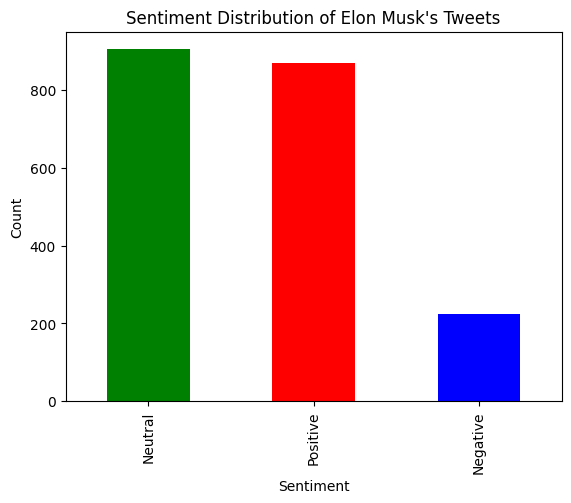

In [100]:
import matplotlib.pyplot as plt
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution of Elon Musk's Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


<ipython-input-101-c7b9d6bf7433>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sentiment'].value_counts())


<Axes: xlabel='count', ylabel='Density'>

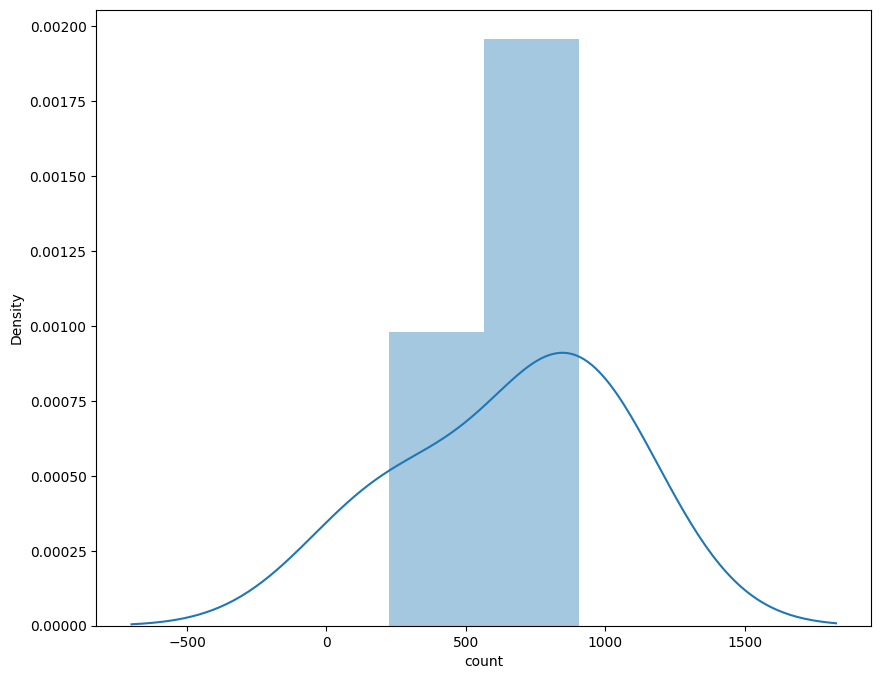

In [101]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.distplot(data['Sentiment'].value_counts())

In [102]:
data.columns

Index(['Unnamed: 0', 'Text', 'Sentiment'], dtype='object')

In [103]:
data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
data

,Index,Text,Sentiment
0,1,@kunalb11 I’m an alien,Neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Neutral
2,3,@joerogan @Spotify Great interview!,Positive
3,4,@gtera27 Doge is underestimated,Negative
4,5,@teslacn Congratulations Tesla China for amazi...,Positive
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",Negative
1995,1996,@PPathole Make sure to read ur terms &amp; con...,Positive
1996,1997,@TeslaGong @PPathole Samwise Gamgee,Neutral
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,Negative


<Axes: xlabel='Index', ylabel='Sentiment'>

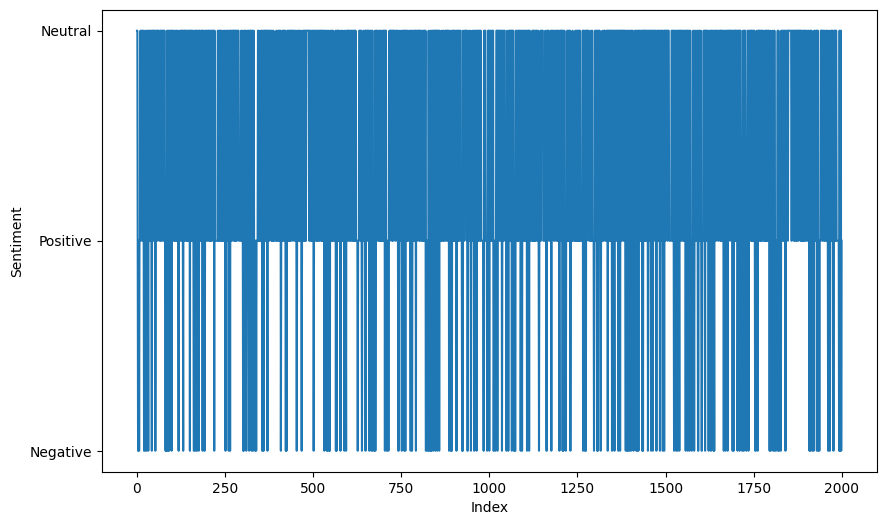

In [104]:
plt.figure(figsize=(10,6))
sns.lineplot(y='Sentiment',x='Index',data=data)

In [105]:
data['word_count']=data['Text'].str.split().apply(len)
data['word_count']

0        4
1       13
2        4
3        4
4       17
        ..
1994    23
1995    12
1996     4
1997     7
1998     4
Name: word_count, Length: 1999, dtype: int64

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='Sentiment'>

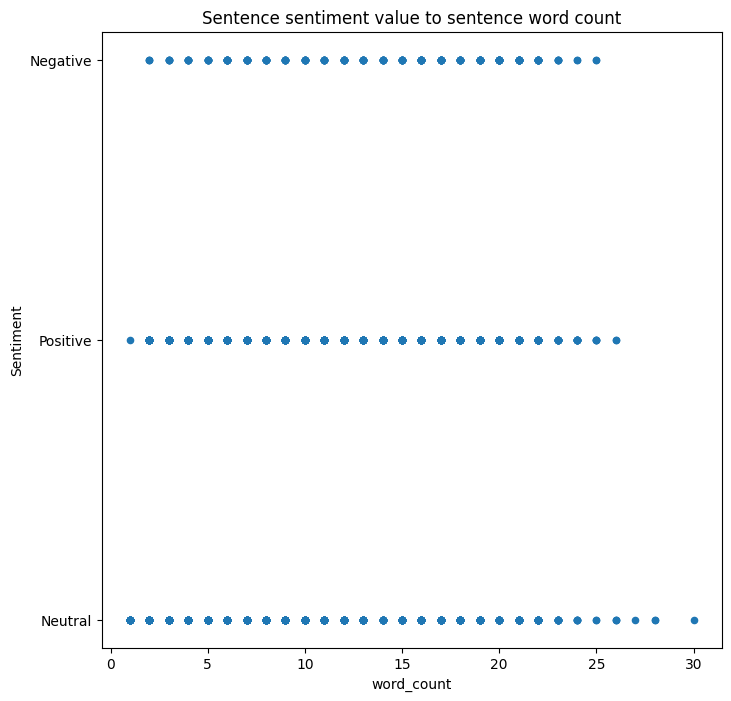

In [106]:
data.plot.scatter(x='word_count',y='Sentiment',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [107]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [108]:
import pandas as pd
data = pd.read_csv("Elon_musk.csv", encoding=encoding)
data

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [109]:
import nltk

In [110]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
words = nltk.word_tokenize(data.to_string())

In [112]:
print(words)

['Unnamed', ':', '0', 'Text', '0', '1', '@', 'kunalb11', 'I', '’', 'm', 'an', 'alien', '1', '2', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '2', '3', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '3', '4', '@', 'gtera27', 'Doge', 'is', 'underestimated', '4', '5', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', '5', '6', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', '6', '7', 'Frodo', 'was', 'the', 'underdoge', ',', '\\nAll', 'thought', 'he', 'would', 'fail', ',', '\\nHimself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zGxJFDzzrM', '7', '8', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '8', '9', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'repr

In [113]:
len(words)

33565

In [114]:
words2=[word.lower()for word in words]
print(words2)

['unnamed', ':', '0', 'text', '0', '1', '@', 'kunalb11', 'i', '’', 'm', 'an', 'alien', '1', '2', '@', 'id_aa_carmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next-level', '.', 'have', 'you', 'tried', 'it', '?', '2', '3', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '3', '4', '@', 'gtera27', 'doge', 'is', 'underestimated', '4', '5', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', '.', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', '5', '6', 'happy', 'new', 'year', 'of', 'the', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', '6', '7', 'frodo', 'was', 'the', 'underdoge', ',', '\\nall', 'thought', 'he', 'would', 'fail', ',', '\\nhimself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zgxjfdzzrm', '7', '8', '@', 'owensparks_', '@', 'flcnhvy', '@', 'anonyx10', 'haha', 'thanks', ':', ')', '8', '9', '@', 'flcnhvy', '@', 'anonyx10', 'indeed', '!', 'tweets', 'definitely', 'do', 'not', 'repr

In [115]:
from nltk.corpus import stopwords
stopwords_list=stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [116]:
words3=[word for word in words2 if word not in stopwords_list]
words3
print("after stopwords",words3)

after stopwords ['unnamed', ':', '0', 'text', '0', '1', '@', 'kunalb11', '’', 'alien', '1', '2', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'tried', '?', '2', '3', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '3', '4', '@', 'gtera27', 'doge', 'underestimated', '4', '5', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'next', 'even', '!', '!', '5', '6', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', '6', '7', 'frodo', 'underdoge', ',', '\\nall', 'thought', 'would', 'fail', ',', '\\nhimself', '.', 'https', ':', '//t.co/zgxjfdzzrm', '7', '8', '@', 'owensparks_', '@', 'flcnhvy', '@', 'anonyx10', 'haha', 'thanks', ':', ')', '8', '9', '@', 'flcnhvy', '@', 'anonyx10', 'indeed', '!', 'tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', '9', '10', 'entertaining', 'outcome', 'likely', '10', '11', '@', 'givedirectly', 'sent', '11', '12', 'agree', 'cl

In [117]:
len(words3)

26939

In [118]:
import string
words4=[word for word in words3 if word not in string.punctuation]
words4
print("after string punctuations",words4)

after string punctuations ['unnamed', '0', 'text', '0', '1', 'kunalb11', '’', 'alien', '1', '2', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', 'tried', '2', '3', 'joerogan', 'spotify', 'great', 'interview', '3', '4', 'gtera27', 'doge', 'underestimated', '4', '5', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', '5', '6', 'happy', 'new', 'year', 'ox', 'https', '//t.co/9wfkmyu2oj', '6', '7', 'frodo', 'underdoge', '\\nall', 'thought', 'would', 'fail', '\\nhimself', 'https', '//t.co/zgxjfdzzrm', '7', '8', 'owensparks_', 'flcnhvy', 'anonyx10', 'haha', 'thanks', '8', '9', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '9', '10', 'entertaining', 'outcome', 'likely', '10', '11', 'givedirectly', 'sent', '11', '12', 'agree', 'clubhouse', 'kanyewest', '12', '13', 'https', '//t.co/3rwe9uhsts', '13', '14', 'geoffkeighley', 'unrealengine', '’', 'getting', 'real', '

In [119]:
len(words4)

19973

In [120]:
from collections import Counter

# Count the frequency of each word
word_counts = Counter(words4)

# Print the word counts
print(word_counts)

Counter({'https': 631, '’': 302, 'spacex': 247, 'amp': 219, 'tesla': 168, 'erdayastronaut': 142, 'rt': 127, 'ppathole': 123, 'flcnhvy': 114, 'yes': 85, 'u+0001f923': 77, 'great': 75, 'teslaownerssv': 73, 'wholemarsblog': 68, '…': 63, 'teslarati': 59, 'haha': 55, 'nasaspaceflight': 55, 'good': 51, 'launch': 47, 'sure': 43, 'would': 40, 'yeah': 40, 'much': 40, 'cleantechnica': 40, 'first': 38, 'one': 38, 'dragon': 38, 'like': 37, 'true': 35, 'kristennetten': 35, 'probably': 35, 'nasa': 33, 'rationaletienne': 33, 'also': 33, 'new': 32, 'people': 32, 'make': 32, 'id_aa_carmack': 31, '9': 31, 'marcushousegame': 31, 'need': 30, 'engineers_feed': 30, 'space_station': 30, 'maybe': 30, 'year': 29, 'high': 29, 'falcon': 29, 'starship': 29, '“': 29, 'next': 28, 'ercxspace': 28, 'production': 28, 'evafoxu': 27, '3': 26, 'still': 26, '”': 26, 'soon': 26, 'ajtourville': 25, 'coming': 25, 'model': 25, 'lot': 24, 'could': 24, 'mission': 23, 'earth': 23, 'work': 23, 'lexfridman': 23, 'day': 23, 'right'

In [121]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~.....''``'s'''

words_without_punctuation = []

for word in words4:
    if word not in punctuations:
        words_without_punctuation.append(word)

In [122]:
len(words_without_punctuation)

19954

In [123]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()
stemmed_words = [porter_stemmer.stem(word) for word in words_without_punctuation]

print(len(stemmed_words))

19954


In [124]:
from collections import Counter

# Count the frequency of each word
word_counts = Counter(stemmed_words)

# Print the word counts
print(word_counts)

Counter({'http': 631, '’': 302, 'spacex': 247, 'amp': 219, 'tesla': 170, 'erdayastronaut': 142, 'rt': 127, 'ppathol': 123, 'flcnhvi': 114, 'ye': 85, 'u+0001f923': 77, 'great': 75, 'teslaownerssv': 73, 'wholemarsblog': 68, '…': 63, 'launch': 62, 'teslarati': 59, 'engin': 57, 'haha': 55, 'nasaspaceflight': 55, 'good': 52, 'need': 51, 'like': 50, 'work': 49, 'make': 49, 'year': 48, 'product': 45, 'sure': 43, 'would': 40, 'yeah': 40, 'much': 40, 'dragon': 40, 'probabl': 40, 'cleantechnica': 40, 'first': 38, 'one': 38, 'use': 38, 'test': 38, 'come': 37, 'day': 37, 'time': 36, 'land': 36, 'true': 35, 'kristennetten': 35, 'go': 34, 'nasa': 33, 'rationaletienn': 33, 'also': 33, 'new': 32, 'peopl': 32, 'id_aa_carmack': 31, '9': 31, 'get': 31, 'marcushousegam': 31, 'starship': 31, 'flight': 31, 'high': 30, 'engineers_fe': 30, 'car': 30, 'space_st': 30, 'mayb': 30, 'falcon': 29, 'lot': 29, '“': 29, 'next': 28, 'ercxspac': 28, 'evafoxu': 27, '3': 26, 'still': 26, '”': 26, 'soon': 26, 'mission': 25

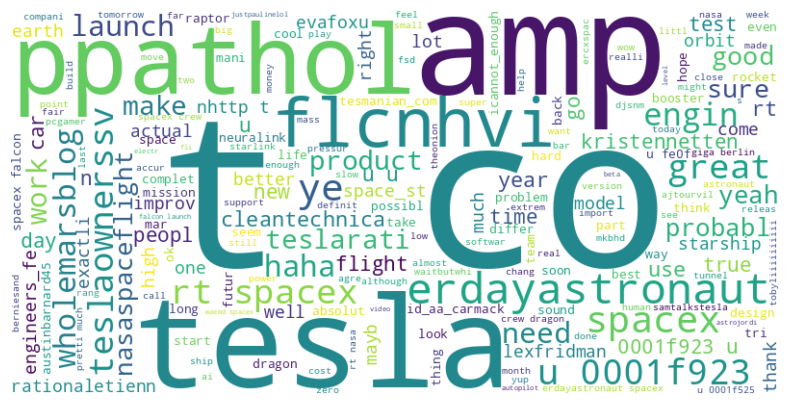

In [125]:
from wordcloud import WordCloud

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(stemmed_words))

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [126]:
doc = " ".join(words_without_punctuation)
doc

"unnamed 0 text 0 1 kunalb11 ’ alien 1 2 id_aa_carmack ray tracing cyberpunk hdr next-level tried 2 3 joerogan spotify great interview 3 4 gtera27 doge underestimated 4 5 teslacn congratulations tesla china amazing execution last year next even 5 6 happy new year ox https //t.co/9wfkmyu2oj 6 7 frodo underdoge \\nall thought would fail \\nhimself https //t.co/zgxjfdzzrm 7 8 owensparks_ flcnhvy anonyx10 haha thanks 8 9 flcnhvy anonyx10 indeed tweets definitely represent real-world time allocation 9 10 entertaining outcome likely 10 11 givedirectly sent 11 12 agree clubhouse kanyewest 12 13 https //t.co/3rwe9uhsts 13 14 geoffkeighley unrealengine ’ getting real 14 15 bought dogecoin lil x toddler hodler 15 16 joshmanmode definitely issues sentencing seems bit high 16 17 freewalletorg thanks fixing 17 18 freewalletorg please unlock account 18 19 astrojordy u+0001f923 u+0001f923 19 20 true power haha https //t.co/fc9uhqsd7o 20 21 freewalletorg crypto wallet ’ give private keys avoided costs

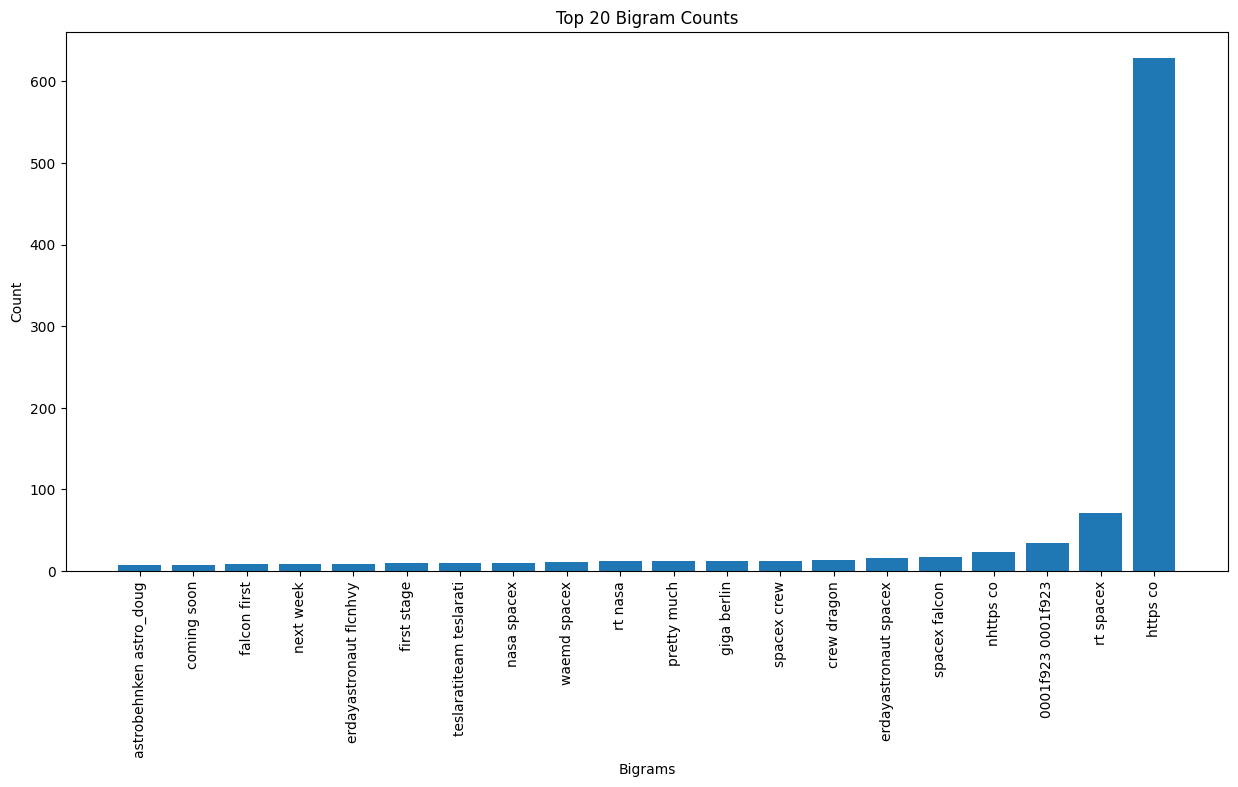

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object with ngram_range=(2, 2) to extract bigrams
vect = CountVectorizer(ngram_range=(2, 2))


# Fit the vectorizer to the document
counts = vect.fit_transform([doc])

# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()

# Get the top 20 bigram counts
top_20_bigrams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 bigram counts
plt.figure(figsize=(15, 7))
plt.bar(vocab[top_20_bigrams], counts.toarray()[0, top_20_bigrams])
plt.xticks(rotation=90)
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.title("Top 20 Bigram Counts")
plt.show()

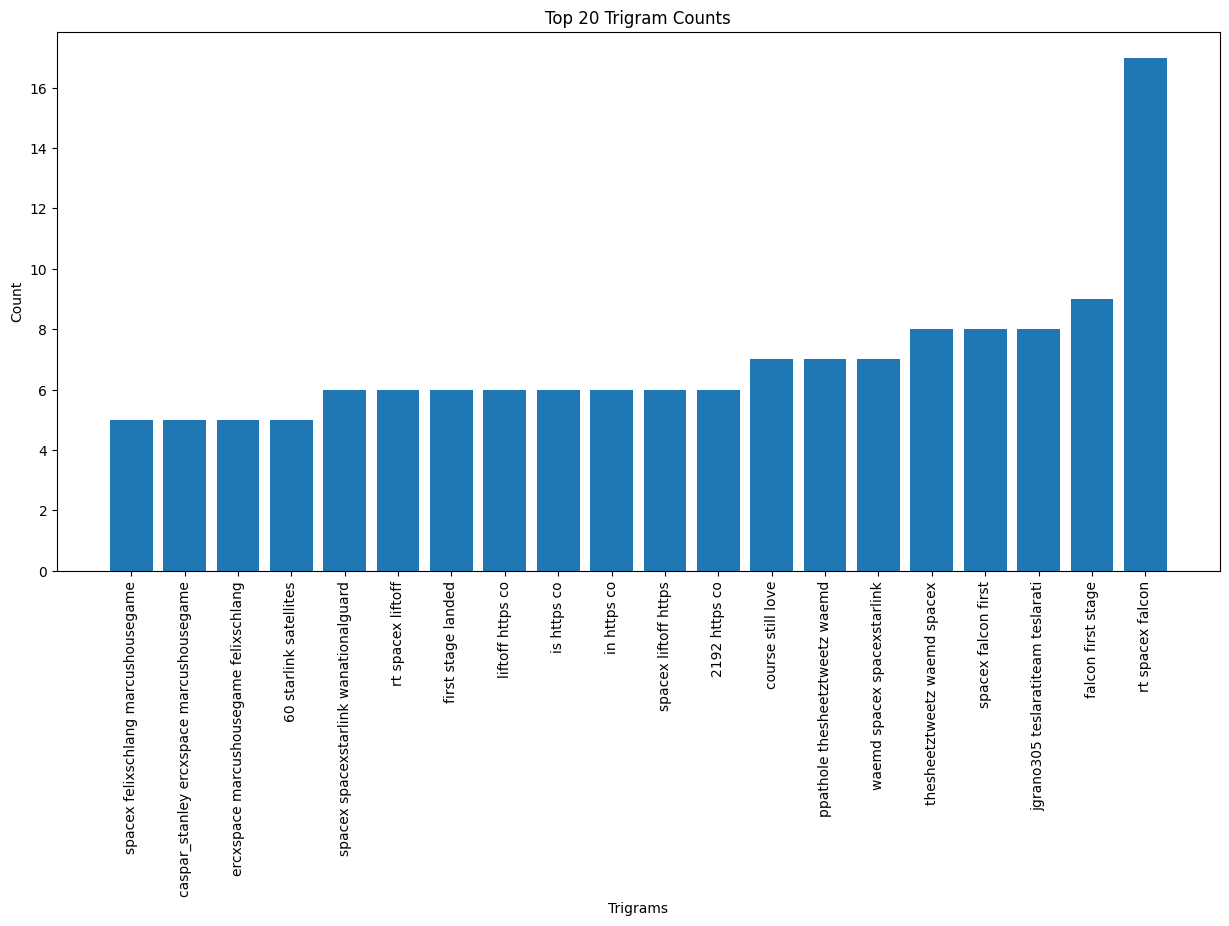

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object with ngram_range=(3, 3) to extract trigrams
vect = CountVectorizer(ngram_range=(3, 3))


# Fit the vectorizer to the document
counts = vect.fit_transform([doc])

# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()

# Get the top 20 trigram counts
top_20_trigrams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 trigram counts
plt.figure(figsize=(15, 7))
plt.bar(vocab[top_20_trigrams], counts.toarray()[0, top_20_trigrams])
plt.xticks(rotation=90)
plt.xlabel("Trigrams")
plt.ylabel("Count")
plt.title("Top 20 Trigram Counts")
plt.show()

In [129]:
import spacy
nlp=spacy.load('en_core_web_sm')

one_block=doc
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [130]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["Text"])
affinity_scores = cosine_similarity(tfidf_matrix)
print(affinity_scores)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.01943106 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.0547745  0.        ]
 [0.         0.01943106 0.         ... 0.0547745  1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
